In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style="whitegrid")
color_palette = ['Red', 'Black', 'Blue']
figsize=(12,6)

In [4]:
df_dir = {}

In [5]:
as_number = '13129'
arrival_rate = '0.003'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 't':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for std in range(1, 11):
        std_dev = '{:4.2f}'.format(std*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration + '_' + std_dev
        df_id = run_id.replace('.', '_')
        exec(df_id + '_df = pd.read_csv(' + '"overall_carbon_footprint_data/' + run_id + '/timeslot_data.csv' + '", index_col="timeslot")' )
        exec('df_dir["' + df_id + '"] = ' + df_id + '_df')
        df_dir[df_id]['Optimizer'] = opt_name[opt]
        df_dir[df_id]['STD'] = std_dev
        #df_dir[df_id]['Server Spread'] = df_dir[df_id]['server_count'] / df_dir[df_id]['vnf_count']
        #df_dir[df_id]['NFV-POD Spread'] = df_dir[df_id]['co_count'] / df_dir[df_id]['vnf_count']
        print(df_id)

c_13129_0_003_3600_0_01
c_13129_0_003_3600_0_02
c_13129_0_003_3600_0_03
c_13129_0_003_3600_0_04
c_13129_0_003_3600_0_05
c_13129_0_003_3600_0_06
c_13129_0_003_3600_0_07
c_13129_0_003_3600_0_08
c_13129_0_003_3600_0_09
c_13129_0_003_3600_0_10
t_13129_0_003_3600_0_01
t_13129_0_003_3600_0_02
t_13129_0_003_3600_0_03
t_13129_0_003_3600_0_04
t_13129_0_003_3600_0_05
t_13129_0_003_3600_0_06
t_13129_0_003_3600_0_07
t_13129_0_003_3600_0_08
t_13129_0_003_3600_0_09
t_13129_0_003_3600_0_10
f_13129_0_003_3600_0_01
f_13129_0_003_3600_0_02
f_13129_0_003_3600_0_03
f_13129_0_003_3600_0_04
f_13129_0_003_3600_0_05
f_13129_0_003_3600_0_06
f_13129_0_003_3600_0_07
f_13129_0_003_3600_0_08
f_13129_0_003_3600_0_09
f_13129_0_003_3600_0_10


In [13]:
data_df = pd.concat(list(df_dir.values()), axis=0)

In [14]:
data_df.head()

,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max,Optimizer,STD
timeslot,,,,,,,,,,,,
0,0.000,0.000,0.000,100.000000,0,15.0,16.35,27.800000,41.95,46.0,Optimal,0.08
1,21.527,19.088,14.135,95.238095,0,15.0,15.00,22.100000,36.10,37.0,Optimal,0.08
2,39.203,33.785,22.379,80.000000,0,14.0,14.70,19.500000,30.10,35.0,Optimal,0.08
3,26.598,24.462,12.347,84.090909,2,14.0,15.60,22.888889,34.60,35.0,Optimal,0.08
4,72.103,63.501,22.379,81.632653,0,16.0,16.60,23.666667,31.90,33.0,Optimal,0.08


<Figure size 1440x648 with 0 Axes>

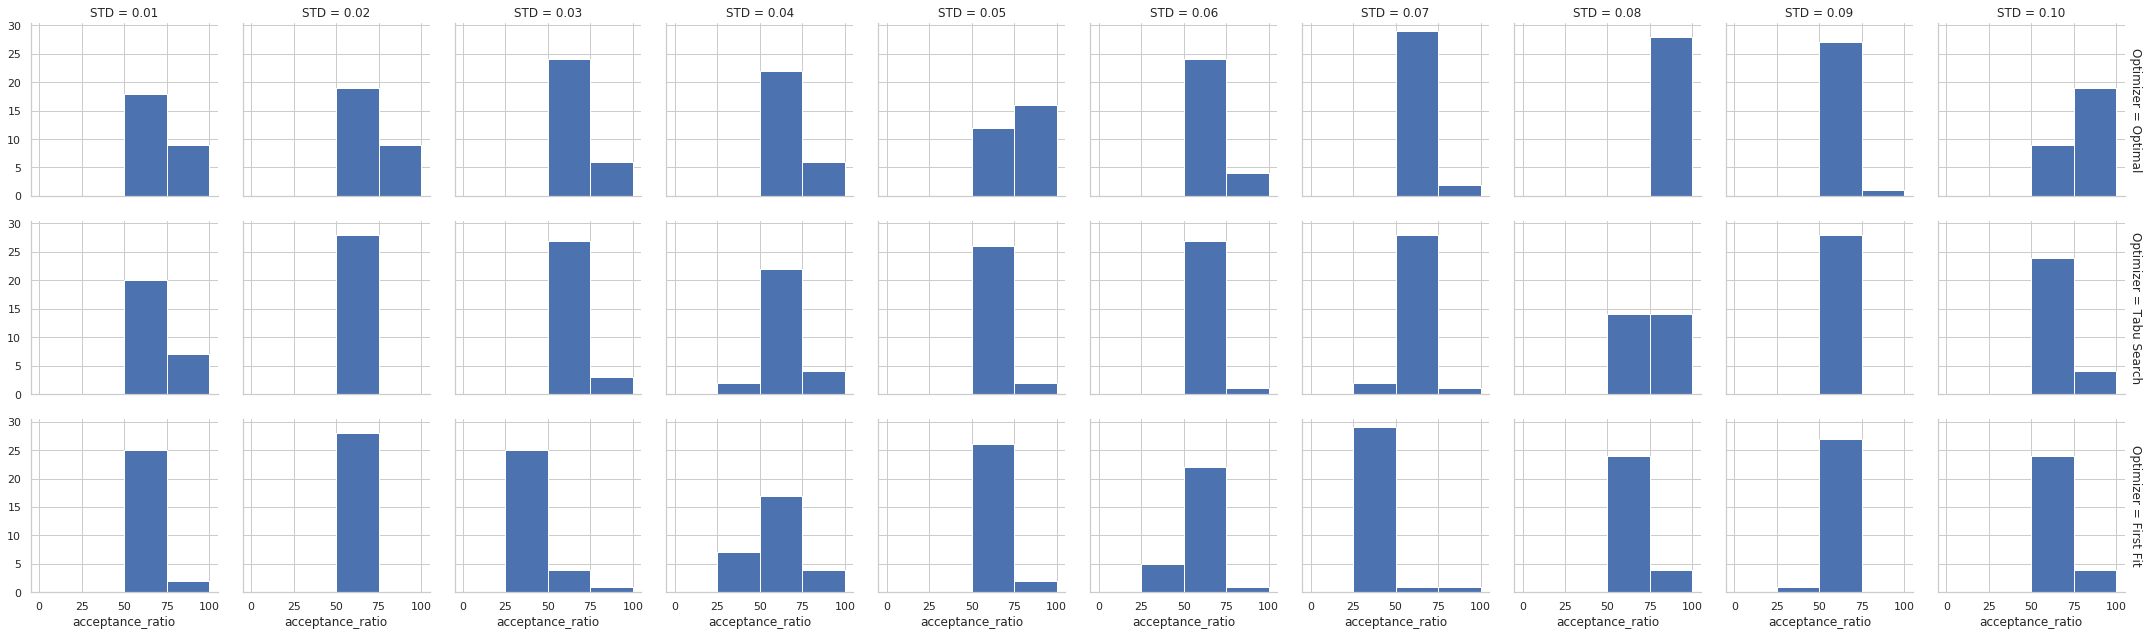

In [28]:
plt.figure(figsize=(20,9))
grid = sns.FacetGrid(data_df, row="Optimizer", col="STD", margin_titles=True)
grid.map(plt.hist, "acceptance_ratio", bins=np.linspace(0, 100, 5));

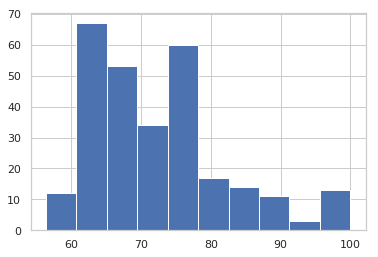

In [23]:
data_df[data_df['Optimizer'] == 'Optimal']['acceptance_ratio'].hist()

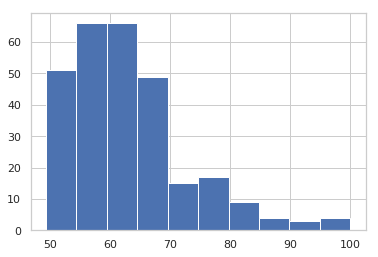

In [24]:
data_df[data_df['Optimizer'] == 'Tabu Search']['acceptance_ratio'].hist()

In [ ]:
cf_df = c_tsdf[['timeslot', 'carbon_footprint']]
cf_df.columns = ['Timeslot', 'Optimal']
cf_df.loc[:,'Tabu Search'] = h_tsdf['carbon_footprint']
cf_df.loc[:,'Baseline'] = f_tsdf['carbon_footprint']

In [ ]:
cf_df.head()

In [ ]:
ts_melt = cf_df.melt(id_vars='Timeslot', var_name="Optimizer", value_name="Carbon Footprint")
mask = ((ts_melt['Timeslot'] <= 24) & (ts_melt['Timeslot'] > 0))
ts_melt = ts_melt[mask]
ts_melt.head()

In [ ]:
plt.figure(figsize=figsize)

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bars = sns.barplot(x="Timeslot", y="Carbon Footprint", hue="Optimizer", data=ts_melt, 
            palette=color_palette)

num_locations = len(ts_melt['Timeslot'].unique())
hatches = itertools.cycle(['/', 'o', 'x', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(bars.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
plt.legend(loc='upper right', fancybox=True, shadow=True, ncol=3)

In [ ]:
gn_df = c_tsdf[['timeslot', 'green_energy']]
gn_df.columns = ['Timeslot', 'Optimal']
gn_df.loc[:,'Tabu Search'] = h_tsdf['green_energy']
gn_df.loc[:,'Baseline'] = f_tsdf['green_energy']

In [ ]:
gn_df.head()

In [ ]:
gn_melt = gn_df.melt(id_vars='Timeslot', var_name="Optimizer", value_name="Green Energy")
mask = ((gn_melt['Timeslot'] <= 24) & (gn_melt['Timeslot'] > 0))
gn_melt = gn_melt[mask]
gn_melt.head()

In [ ]:
fig, ax = plt.subplots(figsize=figsize)
g = sns.lineplot(x='Timeslot', y='Green Energy', hue='Optimizer', data=gn_melt, ax=ax, 
                 style="Optimizer", markers=True, palette=color_palette, markersize=8)

g.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 24)
plt.ylim(0, 119)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='upper left', fancybox=True, shadow=True, ncol=3)
#plt.savefig('lineplot.pdf')